**IFSP - Campus Campinas** <br>
**Pós-graduação em Ciência de Dados** <br>
**Disciplina D3TOP/2023 – Tópicos em Ciência de Dados** <br>

**Projeto em Grupo - Parte 2**

#### Sprint 1 - v 2.1 
- pre-processamento com Spacy seguido de Neattext
- feature extraction com TfidfVectorizer na coluna 'Texto' da PLO
- treinamento com LogisticRegression
- rodado em PC local (não AWS)


Professor: Samuel Martins (samuel.martins@ifsp.edu.br)<br>
Aluno: Swift Motoo Yaguchi - CP301665X

------

### 1. Etapa de limpeza e pré-processamento

##### Instalando bibliotecas

In [1]:
#Upgrade dependencies
#!pip install --upgrade pip
#!pip install --upgrade scikit-learn
#!pip install --upgrade wordcloud
#!pip install --upgrade sagemaker

In [85]:
import pandas as pd
import numpy as np

##### Leitura da base de dados

In [10]:
df = pd.read_csv('PLO 2019 v3a.csv', sep=';')
df.head()

,Texto,Ementa,Vereador,Data,Nota,isUtil
0,"Art. I Fica denominado Praça Sandra Hitomi Takahashi o Sistema de Recreio 01 (Quarteirão 740, Código Cartográfica 3234.6105.0001, com área de 168,00m 2 ) do loteamento Cidade Universitária Campineira, distrito Barão Geraldo, situado na Avenida Dr. Romeu Tórtima (Avenida 01) do mesmo loteamento.\n\nArt. 2 Esta Lei entra em vigor na data de sua publicação.",DENOMINA PRAÇA SANDRA HITOMI TAKAHASHI UM SISTEMA DE RECREIO DO MUNICÍPIO DE CAMPINAS.,Carmo Luiz,2019,9,não
1,"Art. lº Ficam proibidos a comercialização e o uso de espumas, serpentinas e produtos similares acondicionados em spray no município de Campinas.\n\n§ lº A proibição de que trata o caput abrange os produtos com a denominação ""espuma de Carnaval"", ""neve de Carnaval"", ""neve artificial"", ""serpentina"", ""teia"" ou denominação similar acondicionados em sprê1y que possam entrai- em contato direto com a pele, mucosas ou olhos.\n\n§ 2º As espumas E xpansivas de aplicação na indústria, na construção civil e em outras atividades regulamentadas ficam excluídas da proibição de que trata o caput.\n\nArt. 2º O Poder Executivo, por meio de seus órgãos competentes, promoverá ações de fiscalização dos estabelecimentos que comercializarem o:s produtos a que se referem o caput e o § lº do art. 1º desta Lei.\n\nParágrafo unico. A atuação dos agentes de fiscalização poderá ocorrer independentemente de denúncia ou reclamação.\n\nArt. 3º O descumprimento do disposto nesta Lei acarretará ao estabelecimento infrator a aplicação de multa no valor de 500 (quinhentas) Unidades Fiscais de Campinas - UFICs, que será dobrado na primeira reincidência e quadruplicado a partir da segunda reincidência, sem prejuízo das demais penalidades aplicáveis.\n\nParágrafo único. Será considerado reincidência o cometimento por mais de uma vez da mesma infração tipificada nesta Lei no mesmo dia ou em até trinta dias contados da primeira expedição do auto de infração.\n\nArt. 4º\tA receita da aplicação das multas será revertida para o Fundo de Recuperação, Manutenção e Preservação do Meio Ambiente - Proamb.\n\nArt. 5º Na hipótes,e de o infrator ser vendedor ambulante, ocorrerá apenas a apreensão dos produtos a que se referem o caput e o § lº\tcio art. lº desta Lei, sem preJuízo de outras sanções que couberem na forma da lei.\nArt. 6º Quando em posse de usuário, os produtos referidos no caput e no\n§ lº\tdo art. lº\tserão sumariamente apreendidos, não tendo o infrator direito a qualquer indenização nem à restituição dos produtos.\n\nArt. 7º Esta Lei entra em vigor na data de sua publicação.",PROÍBE O COMÉRCIO E O USO DOS PRODUTOS QUE ESPECIFICA ACONDICIONADOS EM SPRAY NO MUNICÍPIO DE CAMPINAS E DÁ OUTRAS PROVIDÊNCIAS.,Luiz Rossini,2019,13,não
2,"Art. 1 0 Poder Executivo municipal deverá disponibilizar, por meio do site oficial da Prefeitura Municipal de Campinas, um espaço em área de fácil acesso denominado Portal de Obras Públicas, obrigatoriamente com as seguintes informações de todas as obras públicas do Município:\nI\t- nome da obra,\nII\t- classificação da obra,\nIII\t- número da licitação correspondente à contratação da empresa responsável pela obra,\nIV\t- número do contrato,\nV\t- empresa responsável por executar a obra,\nVI\t- valor estimado da obra,\nVII\t- valor adicional da obra, se houver termo aditivo,\nVIII\t- situação em que se encontra a obra,\nIX\t- data de início da obra,\nX\t- data de término da obra,\nXI\t- prazo de prorrogação da obra, se for o caso,\nXII\t- especificação e valor da fonte de recursos,\nXIII\t- cronograma das ações que serão realizadas durante a obra,\nXIV\t- anexos referentes à obra,\nXV\t- justificativa de interrupção, paralisação ou cancelamento da obra, se for o caso.\n\nParágrafo único. Nos anexos deverão constar a planilha orçamentária, o contrato com a empresa responsável pela obra e os termos aditivos, caso existam.\n\nArt. 2 As informações de que trata o art. I P deverão ser disponibilizadas sem prejuízo de outras info

In [11]:
# É possível alterar as opções na atividade para exibir mais dados de texto.
pd.options.display.max_rows
pd.set_option('display.max_colwidth', None)
df.head()

,Texto,Ementa,Vereador,Data,Nota,isUtil
0,"Art. I Fica denominado Praça Sandra Hitomi Takahashi o Sistema de Recreio 01 (Quarteirão 740, Código Cartográfica 3234.6105.0001, com área de 168,00m 2 ) do loteamento Cidade Universitária Campineira, distrito Barão Geraldo, situado na Avenida Dr. Romeu Tórtima (Avenida 01) do mesmo loteamento.\n\nArt. 2 Esta Lei entra em vigor na data de sua publicação.",DENOMINA PRAÇA SANDRA HITOMI TAKAHASHI UM SISTEMA DE RECREIO DO MUNICÍPIO DE CAMPINAS.,Carmo Luiz,2019,9,não
1,"Art. lº Ficam proibidos a comercialização e o uso de espumas, serpentinas e produtos similares acondicionados em spray no município de Campinas.\n\n§ lº A proibição de que trata o caput abrange os produtos com a denominação ""espuma de Carnaval"", ""neve de Carnaval"", ""neve artificial"", ""serpentina"", ""teia"" ou denominação similar acondicionados em sprê1y que possam entrai- em contato direto com a pele, mucosas ou olhos.\n\n§ 2º As espumas E xpansivas de aplicação na indústria, na construção civil e em outras atividades regulamentadas ficam excluídas da proibição de que trata o caput.\n\nArt. 2º O Poder Executivo, por meio de seus órgãos competentes, promoverá ações de fiscalização dos estabelecimentos que comercializarem o:s produtos a que se referem o caput e o § lº do art. 1º desta Lei.\n\nParágrafo unico. A atuação dos agentes de fiscalização poderá ocorrer independentemente de denúncia ou reclamação.\n\nArt. 3º O descumprimento do disposto nesta Lei acarretará ao estabelecimento infrator a aplicação de multa no valor de 500 (quinhentas) Unidades Fiscais de Campinas - UFICs, que será dobrado na primeira reincidência e quadruplicado a partir da segunda reincidência, sem prejuízo das demais penalidades aplicáveis.\n\nParágrafo único. Será considerado reincidência o cometimento por mais de uma vez da mesma infração tipificada nesta Lei no mesmo dia ou em até trinta dias contados da primeira expedição do auto de infração.\n\nArt. 4º\tA receita da aplicação das multas será revertida para o Fundo de Recuperação, Manutenção e Preservação do Meio Ambiente - Proamb.\n\nArt. 5º Na hipótes,e de o infrator ser vendedor ambulante, ocorrerá apenas a apreensão dos produtos a que se referem o caput e o § lº\tcio art. lº desta Lei, sem preJuízo de outras sanções que couberem na forma da lei.\nArt. 6º Quando em posse de usuário, os produtos referidos no caput e no\n§ lº\tdo art. lº\tserão sumariamente apreendidos, não tendo o infrator direito a qualquer indenização nem à restituição dos produtos.\n\nArt. 7º Esta Lei entra em vigor na data de sua publicação.",PROÍBE O COMÉRCIO E O USO DOS PRODUTOS QUE ESPECIFICA ACONDICIONADOS EM SPRAY NO MUNICÍPIO DE CAMPINAS E DÁ OUTRAS PROVIDÊNCIAS.,Luiz Rossini,2019,13,não
2,"Art. 1 0 Poder Executivo municipal deverá disponibilizar, por meio do site oficial da Prefeitura Municipal de Campinas, um espaço em área de fácil acesso denominado Portal de Obras Públicas, obrigatoriamente com as seguintes informações de todas as obras públicas do Município:\nI\t- nome da obra,\nII\t- classificação da obra,\nIII\t- número da licitação correspondente à contratação da empresa responsável pela obra,\nIV\t- número do contrato,\nV\t- empresa responsável por executar a obra,\nVI\t- valor estimado da obra,\nVII\t- valor adicional da obra, se houver termo aditivo,\nVIII\t- situação em que se encontra a obra,\nIX\t- data de início da obra,\nX\t- data de término da obra,\nXI\t- prazo de prorrogação da obra, se for o caso,\nXII\t- especificação e valor da fonte de recursos,\nXIII\t- cronograma das ações que serão realizadas durante a obra,\nXIV\t- anexos referentes à obra,\nXV\t- justificativa de interrupção, paralisação ou cancelamento da obra, se for o caso.\n\nParágrafo único. Nos anexos deverão constar a planilha orçamentária, o contrato com a empresa responsável pela obra e os termos aditivos, caso existam.\n\nArt. 2 As informações de que trata o art. I P deverão ser disponibilizadas sem prejuízo de outras info

#### Realização da análise exploratória de dados

In [12]:
df.dtypes

Texto       object
Ementa      object
Vereador    object
Data         int64
Nota         int64
isUtil      object
dtype: object

In [13]:
print('O tamanho do dataset é:', df.shape)

O tamanho do dataset é: (334, 6)


In [14]:
df['isUtil'].value_counts()

isUtil
não    296
sim     38
Name: count, dtype: int64

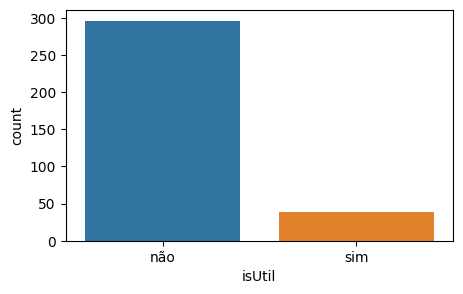

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 3))
sns.countplot(data=df, x='isUtil')
plt.show()

Nota-se que o resultado é desbalanceado

In [16]:
# Verificando se base de dados tem valores ausentes
df.isna().sum()

Texto       235
Ementa        0
Vereador    235
Data          0
Nota          0
isUtil        0
dtype: int64

Há vários campos da coluna 'Texto' e 'Vereador' da PLO sem dados ainda, mas a coluna 'Ementa' está toda preenchida

In [44]:
# Substituir campos vazios por NaN
df['Texto'].fillna(value='tbd', inplace=True)
df['Vereador'].fillna(value='tbd', inplace=True)

In [45]:
df.isna().sum()

Texto       0
Ementa      0
Vereador    0
Data        0
Nota        0
isUtil      0
Label       0
dtype: int64

In [46]:
df['Nota'].value_counts()

Nota
9     87
6     58
7     52
10    28
12    24
14    16
2     14
13    12
11    12
1      9
5      9
8      7
3      3
4      3
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Nota'>

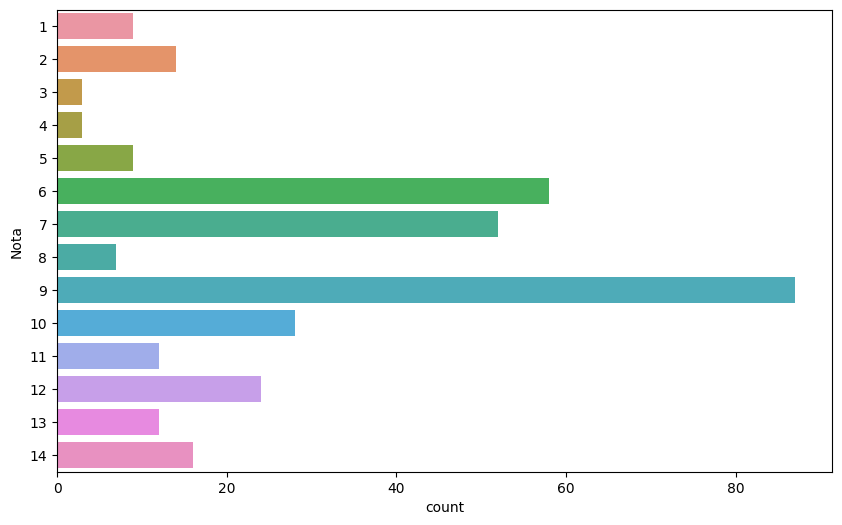

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.countplot(data=df, y='Nota')

<Axes: xlabel='count', ylabel='Nota'>

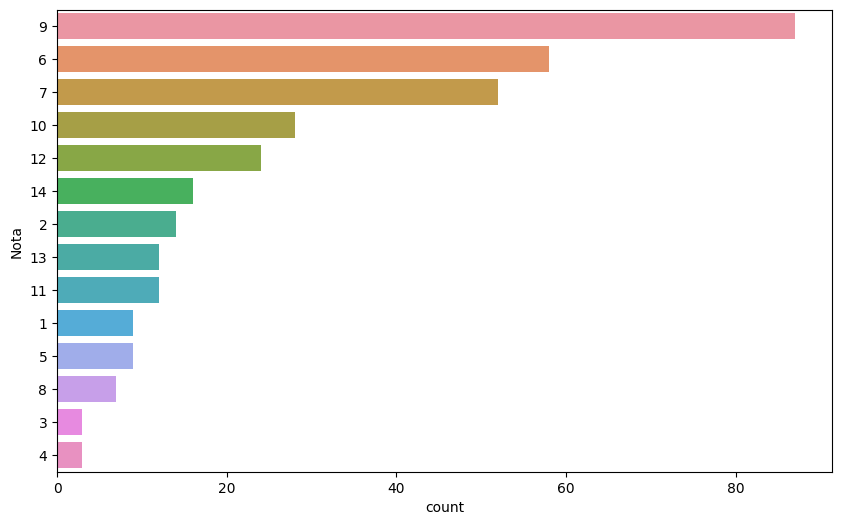

In [19]:
order = df['Nota'].value_counts().index

plt.figure(figsize=(10,6))
sns.countplot(data=df, y='Nota', order=order)

Observa-se que o desbalanceamento dos dados é causado por PLOs com 'Nota' de valores maiores

##### Label Classes

In [20]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(df['isUtil'])

LabelEncoder()

In [21]:
print(f'Class labels')

for label, class_ in enumerate(label_encoder.classes_):
    print(f'{class_} ==> {label}')

Class labels
não ==> 0
sim ==> 1


In [22]:
df['Label'] = label_encoder.transform(df['isUtil'])

In [86]:
df.head()

,Texto,Ementa,Vereador,Data,Nota,isUtil,Label
0,art i fica denominado praça sandra hitomi takahashi recreio 01 quarteirão 740 código cartográfica 323461050001 16800 m 2 loteamento cidade universitária campineira distrito barão geraldo situado avenida dr romeu tórtima avenida 01 loteamento art 2 lei entra vigor data publicação,denomina praça sandra hitomi takahashi recreio município campinas,Carmo Luiz,2019,9,não,0
1,art lº ficam proibidos comercialização uso espumas serpentinas produtos similares acondicionados spray município campinas lº proibição trata caput abrange produtos denominação espuma carnaval neve carnaval neve artificial serpentina teia denominação similar acondicionados sprê1y possam entrai contato direto pele mucosas olhos 2º espumas xpansivas aplicação indústria construção civil atividades regulamentadas ficam excluídas proibição trata caput art 2º executivo órgãos competentes promoverá ações fiscalização estabelecimentos comercializarem produtos referem caput lº art 1º lei parágrafo unico atuação agentes fiscalização ocorrer independentemente denúncia reclamação art 3º descumprimento disposto lei acarretará estabelecimento infrator aplicação multa 500 quinhentas unidades fiscais campinas ufics será dobrado reincidência quadruplicado reincidência prejuízo penalidades aplicáveis parágrafo único será considerado reincidência cometimento mesma infração tipificada lei dia trinta dias contados expedição auto infração art 4º receita aplicação multas será revertida fundo recuperação manutenção preservação ambiente proamb art 5º hipótese infrator vendedor ambulante ocorrerá apreensão produtos referem caput lº cio art lº lei prejuízo sanções couberem lei art 6º posse usuário produtos referidos caput lº art lº serão sumariamente apreendidos tendo infrator direito indenização restituição produtos art 7º lei entra vigor data publicação,proíbe comércio uso produtos especifica acondicionados spray município campinas providências,Luiz Rossini,2019,13,não,0
2,art 1 0 executivo municipal disponibilizar site oficial prefeitura municipal campinas espaço fácil acesso denominado portal obras públicas obrigatoriamente seguintes informações obras públicas município i nome obra ii classificação obra iii licitação correspondente contratação empresa responsável obra iv contrato v empresa responsável executar obra vi estimado obra vii adicional obra houver termo aditivo viii situação encontra obra ix data início obra x data término obra xi prazo prorrogação obra caso xii especificação fonte recursos xiii cronograma ações serão realizadas durante obra xiv anexos referentes obra xv justificativa interrupção paralisação cancelamento obra caso parágrafo único anexos deverão constar planilha orçamentária contrato empresa responsável obra termos aditivos caso existam art 2 informações trata art i p deverão disponibilizadas prejuízo informações estiverem organizadas site oficial prefeitura municipal campinas art 3 despesas decorrentes execução lei correrão conta verbas orçamentárias próprias art 4 lei entra vigor decorridos oitenta dias publicação oficial art ficam revogadas disposições contrário,dispõe acesso informações respeito obras públicas município campinas site prefeitura municipal,Luiz Cirilo,2019,1,sim,1
3,art 1 fica denominada praça iracema costa praça 4 quarteirão 7508 código cartográfico 333464540001 237000 m 2 loteamento jardim maracanã situada rua edson luiz rigonatto rua 13 quadra b loteamento art 2 lei entra vigor data publicação,denomina praça iracema costa praça pública município campinas,Carlão do PT,2019,9,não,0
4,art 1 ficam alterados ss i p 3 2 art 2 2 lei n 14789 4 abril 2014 passa vigorar seguinte redação art 2 2 s 1 2 0 atendimento prioritário trata lei será oferecido quaisquer caixas guichês unidades disponíveis atendimento público s 3 2 estabelecimentos tenham pavimentos superiores caixas atendimento deverão manter atendimento prioritário caixas andar nr,altera redação 1º 3º art 2º lei nº 14789 4 abril 2014 dispõe at

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Texto     99 non-null     object
 1   Ementa    334 non-null    object
 2   Vereador  99 non-null     object
 3   Data      334 non-null    int64 
 4   Nota      334 non-null    int64 
 5   isUtil    334 non-null    object
 6   Label     334 non-null    int32 
dtypes: int32(1), int64(2), object(4)
memory usage: 17.1+ KB


### 2. Pré-Processamento de texto: 

##### Remoção inicial de algumas das palavras irrelevantes, lemmatizaton, nos dados de texto, utilizando a bilioteca SpaCy

In [25]:
#!pip install spacy
# PLOs são em português 
#!python -m spacy download pt  # Portuguese

In [47]:
import spacy
from spacy.lang.pt.stop_words import STOP_WORDS
from spacy.lang.pt import Portuguese
nlp = Portuguese()

In [48]:
nlp_spacy = spacy.load("pt_core_news_sm")   # Portuguese small vocabulary

In [49]:
def remove_stopwords(doc: spacy.tokens.doc.Doc) -> list:
    tokens_without_stopwords = [token.text for token in doc if not token.is_stop]
    text_without_stopwords = ' '.join(tokens_without_stopwords)
    return text_without_stopwords

In [50]:
import re
def process_text(texts):
    final_text_list=[]
    for sent in texts:
        sent = sent.lower() # Lowercase 
        sent = sent.strip() # Remove leading/trailing whitespace
        sent = re.sub('\s+', ' ', sent) # Remove extra space and tabs
        sent = re.sub('[^\w\s]', '', sent)  # Remove punctuations
        sent = re.compile('<.*?>').sub('', sent) # Remove HTML tags/markups:
        filtered_sentence=[]
        sent1 = nlp(sent)
        sent2 = remove_stopwords(sent1)
        filtered_sentence.append(sent2)
        final_string = " ".join(filtered_sentence) # Final string of cleaned words
        final_text_list.append(final_string)
    return final_text_list

In [52]:
df

,Texto,Ementa,Vereador,Data,Nota,isUtil,Label
0,"Art. I Fica denominado Praça Sandra Hitomi Takahashi o Sistema de Recreio 01 (Quarteirão 740, Código Cartográfica 3234.6105.0001, com área de 168,00m 2 ) do loteamento Cidade Universitária Campineira, distrito Barão Geraldo, situado na Avenida Dr. Romeu Tórtima (Avenida 01) do mesmo loteamento.\n\nArt. 2 Esta Lei entra em vigor na data de sua publicação.",DENOMINA PRAÇA SANDRA HITOMI TAKAHASHI UM SISTEMA DE RECREIO DO MUNICÍPIO DE CAMPINAS.,Carmo Luiz,2019,9,não,0
1,"Art. lº Ficam proibidos a comercialização e o uso de espumas, serpentinas e produtos similares acondicionados em spray no município de Campinas.\n\n§ lº A proibição de que trata o caput abrange os produtos com a denominação ""espuma de Carnaval"", ""neve de Carnaval"", ""neve artificial"", ""serpentina"", ""teia"" ou denominação similar acondicionados em sprê1y que possam entrai- em contato direto com a pele, mucosas ou olhos.\n\n§ 2º As espumas E xpansivas de aplicação na indústria, na construção civil e em outras atividades regulamentadas ficam excluídas da proibição de que trata o caput.\n\nArt. 2º O Poder Executivo, por meio de seus órgãos competentes, promoverá ações de fiscalização dos estabelecimentos que comercializarem o:s produtos a que se referem o caput e o § lº do art. 1º desta Lei.\n\nParágrafo unico. A atuação dos agentes de fiscalização poderá ocorrer independentemente de denúncia ou reclamação.\n\nArt. 3º O descumprimento do disposto nesta Lei acarretará ao estabelecimento infrator a aplicação de multa no valor de 500 (quinhentas) Unidades Fiscais de Campinas - UFICs, que será dobrado na primeira reincidência e quadruplicado a partir da segunda reincidência, sem prejuízo das demais penalidades aplicáveis.\n\nParágrafo único. Será considerado reincidência o cometimento por mais de uma vez da mesma infração tipificada nesta Lei no mesmo dia ou em até trinta dias contados da primeira expedição do auto de infração.\n\nArt. 4º\tA receita da aplicação das multas será revertida para o Fundo de Recuperação, Manutenção e Preservação do Meio Ambiente - Proamb.\n\nArt. 5º Na hipótes,e de o infrator ser vendedor ambulante, ocorrerá apenas a apreensão dos produtos a que se referem o caput e o § lº\tcio art. lº desta Lei, sem preJuízo de outras sanções que couberem na forma da lei.\nArt. 6º Quando em posse de usuário, os produtos referidos no caput e no\n§ lº\tdo art. lº\tserão sumariamente apreendidos, não tendo o infrator direito a qualquer indenização nem à restituição dos produtos.\n\nArt. 7º Esta Lei entra em vigor na data de sua publicação.",PROÍBE O COMÉRCIO E O USO DOS PRODUTOS QUE ESPECIFICA ACONDICIONADOS EM SPRAY NO MUNICÍPIO DE CAMPINAS E DÁ OUTRAS PROVIDÊNCIAS.,Luiz Rossini,2019,13,não,0
2,"Art. 1 0 Poder Executivo municipal deverá disponibilizar, por meio do site oficial da Prefeitura Municipal de Campinas, um espaço em área de fácil acesso denominado Portal de Obras Públicas, obrigatoriamente com as seguintes informações de todas as obras públicas do Município:\nI\t- nome da obra,\nII\t- classificação da obra,\nIII\t- número da licitação correspondente à contratação da empresa responsável pela obra,\nIV\t- número do contrato,\nV\t- empresa responsável por executar a obra,\nVI\t- valor estimado da obra,\nVII\t- valor adicional da obra, se houver termo aditivo,\nVIII\t- situação em que se encontra a obra,\nIX\t- data de início da obra,\nX\t- data de término da obra,\nXI\t- prazo de prorrogação da obra, se for o caso,\nXII\t- especificação e valor da fonte de recursos,\nXIII\t- cronograma das ações que serão realizadas durante a obra,\nXIV\t- anexos referentes à obra,\nXV\t- justificativa de interrupção, paralisação ou cancelamento da obra, se for o caso.\n\nParágrafo único. Nos anexos deverão constar a planilha orçamentária, o contrato com a empresa responsável pela obra e os termos aditivos, caso existam.\n\nArt. 2 As informações de que trata o art. I P deverão ser disponibilizadas sem prejuízo de o

In [53]:
print('Processand a coluna Texto')
df['Texto'] = process_text(df['Texto'].tolist())

Processand a coluna Texto


In [54]:
print('Processando a coluna Ementa')
df['Ementa'] = process_text(df['Ementa'].tolist())

Processando a coluna Ementa


In [56]:
df

,Texto,Ementa,Vereador,Data,Nota,isUtil,Label
0,art i fica denominado praça sandra hitomi takahashi recreio 01 quarteirão 740 código cartográfica 323461050001 16800 m 2 loteamento cidade universitária campineira distrito barão geraldo situado avenida dr romeu tórtima avenida 01 loteamento art 2 lei entra vigor data publicação,denomina praça sandra hitomi takahashi recreio município campinas,Carmo Luiz,2019,9,não,0
1,art lº ficam proibidos comercialização uso espumas serpentinas produtos similares acondicionados spray município campinas lº proibição trata caput abrange produtos denominação espuma carnaval neve carnaval neve artificial serpentina teia denominação similar acondicionados sprê1y possam entrai contato direto pele mucosas olhos 2º espumas xpansivas aplicação indústria construção civil atividades regulamentadas ficam excluídas proibição trata caput art 2º executivo órgãos competentes promoverá ações fiscalização estabelecimentos comercializarem produtos referem caput lº art 1º lei parágrafo unico atuação agentes fiscalização ocorrer independentemente denúncia reclamação art 3º descumprimento disposto lei acarretará estabelecimento infrator aplicação multa 500 quinhentas unidades fiscais campinas ufics será dobrado reincidência quadruplicado reincidência prejuízo penalidades aplicáveis parágrafo único será considerado reincidência cometimento mesma infração tipificada lei dia trinta dias contados expedição auto infração art 4º receita aplicação multas será revertida fundo recuperação manutenção preservação ambiente proamb art 5º hipótese infrator vendedor ambulante ocorrerá apreensão produtos referem caput lº cio art lº lei prejuízo sanções couberem lei art 6º posse usuário produtos referidos caput lº art lº serão sumariamente apreendidos tendo infrator direito indenização restituição produtos art 7º lei entra vigor data publicação,proíbe comércio uso produtos especifica acondicionados spray município campinas providências,Luiz Rossini,2019,13,não,0
2,art 1 0 executivo municipal disponibilizar site oficial prefeitura municipal campinas espaço fácil acesso denominado portal obras públicas obrigatoriamente seguintes informações obras públicas município i nome obra ii classificação obra iii licitação correspondente contratação empresa responsável obra iv contrato v empresa responsável executar obra vi estimado obra vii adicional obra houver termo aditivo viii situação encontra obra ix data início obra x data término obra xi prazo prorrogação obra caso xii especificação fonte recursos xiii cronograma ações serão realizadas durante obra xiv anexos referentes obra xv justificativa interrupção paralisação cancelamento obra caso parágrafo único anexos deverão constar planilha orçamentária contrato empresa responsável obra termos aditivos caso existam art 2 informações trata art i p deverão disponibilizadas prejuízo informações estiverem organizadas site oficial prefeitura municipal campinas art 3 despesas decorrentes execução lei correrão conta verbas orçamentárias próprias art 4 lei entra vigor decorridos oitenta dias publicação oficial art ficam revogadas disposições contrário,dispõe acesso informações respeito obras públicas município campinas site prefeitura municipal,Luiz Cirilo,2019,1,sim,1
3,art 1 fica denominada praça iracema costa praça 4 quarteirão 7508 código cartográfico 333464540001 237000 m 2 loteamento jardim maracanã situada rua edson luiz rigonatto rua 13 quadra b loteamento art 2 lei entra vigor data publicação,denomina praça iracema costa praça pública município campinas,Carlão do PT,2019,9,não,0
4,art 1 ficam alterados ss i p 3 2 art 2 2 lei n 14789 4 abril 2014 passa vigorar seguinte redação art 2 2 s 1 2 0 atendimento prioritário trata lei será oferecido quaisquer caixas guichês unidades disponíveis atendimento público s 3 2 estabelecimentos tenham pavimentos superiores caixas atendimento deverão manter atendimento prioritário caixas andar nr,altera redação 1º 3º art 2º lei nº 14789 4 abril 2014 dispõe at

##### Divisão dos dados para treinamento e teste

In [57]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.2, stratify=df['Label'], random_state=42)

In [58]:
print(f"===> TRAIN\n{df_train['Label'].value_counts() / df_train.shape[0]}\n")
print(f"===> TEST\n{df_test['Label'].value_counts() / df_test.shape[0]}")

===> TRAIN
Label
0    0.88764
1    0.11236
Name: count, dtype: float64

===> TEST
Label
0    0.880597
1    0.119403
Name: count, dtype: float64


In [90]:
# save the datasets
df_train.to_csv('test_dataset_train.csv', sep=';', index = False)
df_test.to_csv('test_dataset_test.csv', sep=';', index = False)

In [91]:
df_train

,Texto,Ementa,Vereador,Data,Nota,isUtil,Label,Texto-pre
29,art 1 fica denominada rua osvualte darri rua 06 loteamento residencial villa garden início rua francisco antonio pinto prolongamento rua 14 parque industrial término avenida 01 loteamento art 2 lei entra vigor data publicação,denomina rua osvualte darri via pública município campinas,Zé Carlos,2019,9,não,0,art fica denominada rua osvualte darri rua loteamento residencial villa garden incio rua francisco antonio pinto prolongamento rua parque industrial trmino avenida loteamento art lei entra vigor data publicao
154,tbd,dispõe criação bolsões estacionamento exclusivos motoboys vias públicas campinas providências,tbd,2019,6,não,0,tbd
59,art 10 fica proibido venda comercialização brinquedos nacionais importados constituem réplicas armas fogo armas brancas brinquedo lue tenha cano gatilho município campinas paragrafo unico disposto caput aplica lojas especializadas feiras livres estabelecimento comercial art 20 descumprimento lei sujeitará infrator seguintes penalidades i advertência 11 multa 3000 ufics iii suspensão atividades 30 trinta dias iv cassação alvará funcionamento art 3 0 fica público autorizado celebrar convênios empresas privadas sindicatos entidades caráter público viabilizar perfeita execução lei art 40 executivo regulamentará lei couber prazo 60 sessenta dias contar publicação art 50 lei entra vigor data publicação,proíbe venda brinquedos constituem réplicas simulacros armas fogo armas brancas município campinas providências,Carmo Luiz,2019,13,não,0,art fica proibido venda comercializao brinquedos nacionais importados constituem rplicas armas fogo armas brancas brinquedo lue tenha cano gatilho municpio campinas paragrafo unico disposto caput aplica lojas especializadas feiras livres estabelecimento comercial art descumprimento lei sujeitar infrator seguintes penalidades advertncia multa ufics iii suspenso atividades trinta dias iv cassao alvar funcionamento art fica pblico autorizado celebrar convnios empresas privadas sindicatos entidades carter pblico viabilizar perfeita execuo lei art executivo regulamentar lei couber prazo sessenta dias contar publicao art lei entra vigor data publicao
14,projeto lei ordinária passou tramitar projeto lei complementar n 472021,institui programa árvores qualidade vida município campinas providências,Luiz Rossini,2019,12,não,0,projeto lei ordinria passou tramitar projeto lei complementar n
28,art 1 fica denominado praça benedito carlos martins lazer 02 quarteirão 17039 código cartográfico 341324200526 110903 m 2 loteamento residencial jardim irene situado rua 02 verde 2 loteamento art 2 lei entra vigor data publicação,denomina praça benedito carlos martins lazer município campinas,Jorge Schneider,2019,9,não,0,art fica denominado praa benedito carlos martins lazer quarteiro cdigo cartogrfico loteamento residencial jardim irene situado rua verde loteamento art lei entra vigor data publicao
...,...,...,...,...,...,...,...,...
282,tbd,dispõe permissão circulação veículos transporte aplicativos faixas exclusivas transporte público município campinas,tbd,2019,6,não,0,tbd
270,tbd,institui âmbito município campinas programa farmácia solidária providências,tbd,2019,12,não,0,tbd
273,tbd,denomina centro saúde professora ângela campos trentin centro saúde município campinas,tbd,2019,9,não,0,tbd
116,tbd,altera 2º acrescenta 3º 4º art 16a lei nº 11111 26 dezembro 2001 dispõe imposto propriedade predial territorial urbana iptu providências,tbd,2019,5,sim,1,tbd


In [61]:
df_test

,Texto,Ementa,Vereador,Data,Nota,isUtil,Label
203,tbd,institui semana esportes eletrônicos play hard âmbito município campinas providências,tbd,2019,10,não,0
192,tbd,denomina praça nilson dimarzio lazer município campinas,tbd,2019,9,não,0
206,tbd,institui semana esportes eletrônicos play hard âmbito município campinas providências,tbd,2019,10,não,0
4,art 1 ficam alterados ss i p 3 2 art 2 2 lei n 14789 4 abril 2014 passa vigorar seguinte redação art 2 2 s 1 2 0 atendimento prioritário trata lei será oferecido quaisquer caixas guichês unidades disponíveis atendimento público s 3 2 estabelecimentos tenham pavimentos superiores caixas atendimento deverão manter atendimento prioritário caixas andar nr,altera redação 1º 3º art 2º lei nº 14789 4 abril 2014 dispõe atendimento prioritário município campinas,Paulo Galterio,2019,7,não,0
18,art 1 fica denominada rua vitalino alexandre santos rua 12 loteamento jardim campo belo 2 início rua folia reis rua 01 término divisa loteamento art 2 lei entra vigor data publicação,denomina rua vitalino alexandre santos via pública município campinas,Carmo Luiz,2019,9,não,0
...,...,...,...,...,...,...,...
72,art 1º fica denominada praça etelvina ramos praça 02 quarteirão 2486 código cartográfico 344243870001 383935 m loteamento jardim pedro situada rua ormeno gomes henking rua 12 rua júlio fernandes rua 08 divisa loteamento art 2º lei entra vigor data publicação,denomina praça etelvina ramos praça pública município campinas,Luiz Rossini,2019,9,não,0
277,tbd,dispõe desembarque mulheres idosos pessoas deficiência mobilidade reduzida usuários transporte coletivo urbano passageiros cidade campinas providências,tbd,2019,6,não,0
160,tbd,garante prioridade programas habitacionais mulheres vítimas violência doméstica tráfico pessoas exploração sexual,tbd,2019,7,não,0
161,tbd,garante prioridade programas habitacionais mulheres vítimas violência doméstica tráfico pessoas exploração sexual,tbd,2019,7,não,0


##### Nova remoção na coluna 'Texto' usando biblioteca neattext
- lowering, expand contractions
- remove:
  + punctuations, stop words, urls, emails, numbers, emojis, phone numbers, multiple whitespaces, currency symbols, special characters

In [62]:
import neattext.functions as ntx

def text_preprocessing(text_in: str) -> str:
    text = text_in.lower()
    text = ntx.fix_contractions(text)
    text = ntx.remove_punctuations(text)
    text = ntx.remove_stopwords(text)
    text = ntx.remove_urls(text)
    text = ntx.remove_emails(text)
    text = ntx.remove_numbers(text)
    text = ntx.remove_emojis(text)
    text = ntx.remove_phone_numbers(text)
    text = ntx.remove_multiple_spaces(text)
    text = ntx.remove_currency_symbols(text)
    text = ntx.remove_special_characters(text)
    return text

In [63]:
# progress bar in pandas
#!pip install tqdm

In [64]:
from tqdm import tqdm
tqdm.pandas()  # it enables some new progress bar functions/methods for pandas

In [65]:
# pre-process the training set
df_train['Texto-pre'] = df_train['Texto'].progress_apply(lambda text: text_preprocessing(text))

100%|███████████████████████████████████████████████████████████████████████████████| 267/267 [00:00<00:00, 735.98it/s]


In [66]:
df_train.head()

,Texto,Ementa,Vereador,Data,Nota,isUtil,Label,Texto-pre
29,art 1 fica denominada rua osvualte darri rua 06 loteamento residencial villa garden início rua francisco antonio pinto prolongamento rua 14 parque industrial término avenida 01 loteamento art 2 lei entra vigor data publicação,denomina rua osvualte darri via pública município campinas,Zé Carlos,2019,9,não,0,art fica denominada rua osvualte darri rua loteamento residencial villa garden incio rua francisco antonio pinto prolongamento rua parque industrial trmino avenida loteamento art lei entra vigor data publicao
154,tbd,dispõe criação bolsões estacionamento exclusivos motoboys vias públicas campinas providências,tbd,2019,6,não,0,tbd
59,art 10 fica proibido venda comercialização brinquedos nacionais importados constituem réplicas armas fogo armas brancas brinquedo lue tenha cano gatilho município campinas paragrafo unico disposto caput aplica lojas especializadas feiras livres estabelecimento comercial art 20 descumprimento lei sujeitará infrator seguintes penalidades i advertência 11 multa 3000 ufics iii suspensão atividades 30 trinta dias iv cassação alvará funcionamento art 3 0 fica público autorizado celebrar convênios empresas privadas sindicatos entidades caráter público viabilizar perfeita execução lei art 40 executivo regulamentará lei couber prazo 60 sessenta dias contar publicação art 50 lei entra vigor data publicação,proíbe venda brinquedos constituem réplicas simulacros armas fogo armas brancas município campinas providências,Carmo Luiz,2019,13,não,0,art fica proibido venda comercializao brinquedos nacionais importados constituem rplicas armas fogo armas brancas brinquedo lue tenha cano gatilho municpio campinas paragrafo unico disposto caput aplica lojas especializadas feiras livres estabelecimento comercial art descumprimento lei sujeitar infrator seguintes penalidades advertncia multa ufics iii suspenso atividades trinta dias iv cassao alvar funcionamento art fica pblico autorizado celebrar convnios empresas privadas sindicatos entidades carter pblico viabilizar perfeita execuo lei art executivo regulamentar lei couber prazo sessenta dias contar publicao art lei entra vigor data publicao
14,projeto lei ordinária passou tramitar projeto lei complementar n 472021,institui programa árvores qualidade vida município campinas providências,Luiz Rossini,2019,12,não,0,projeto lei ordinria passou tramitar projeto lei complementar n
28,art 1 fica denominado praça benedito carlos martins lazer 02 quarteirão 17039 código cartográfico 341324200526 110903 m 2 loteamento residencial jardim irene situado rua 02 verde 2 loteamento art 2 lei entra vigor data publicação,denomina praça benedito carlos martins lazer município campinas,Jorge Schneider,2019,9,não,0,art fica denominado praa benedito carlos martins lazer quarteiro cdigo cartogrfico loteamento residencial jardim irene situado rua verde loteamento art lei entra vigor data publicao


In [67]:
# pre-process the training set
df_test['Texto-pre'] = df_test['Texto'].progress_apply(lambda text: text_preprocessing(text))

100%|████████████████████████████████████████████████████████████████████████████████| 67/67 [00:00<00:00, 1000.61it/s]


In [68]:
df_test.head()

,Texto,Ementa,Vereador,Data,Nota,isUtil,Label,Texto-pre
203,tbd,institui semana esportes eletrônicos play hard âmbito município campinas providências,tbd,2019,10,não,0,tbd
192,tbd,denomina praça nilson dimarzio lazer município campinas,tbd,2019,9,não,0,tbd
206,tbd,institui semana esportes eletrônicos play hard âmbito município campinas providências,tbd,2019,10,não,0,tbd
4,art 1 ficam alterados ss i p 3 2 art 2 2 lei n 14789 4 abril 2014 passa vigorar seguinte redação art 2 2 s 1 2 0 atendimento prioritário trata lei será oferecido quaisquer caixas guichês unidades disponíveis atendimento público s 3 2 estabelecimentos tenham pavimentos superiores caixas atendimento deverão manter atendimento prioritário caixas andar nr,altera redação 1º 3º art 2º lei nº 14789 4 abril 2014 dispõe atendimento prioritário município campinas,Paulo Galterio,2019,7,não,0,art ficam alterados ss p art lei n abril passa vigorar seguinte redao art atendimento prioritrio trata lei ser oferecido quaisquer caixas guichs unidades disponveis atendimento pblico estabelecimentos tenham pavimentos superiores caixas atendimento devero manter atendimento prioritrio caixas andar nr
18,art 1 fica denominada rua vitalino alexandre santos rua 12 loteamento jardim campo belo 2 início rua folia reis rua 01 término divisa loteamento art 2 lei entra vigor data publicação,denomina rua vitalino alexandre santos via pública município campinas,Carmo Luiz,2019,9,não,0,art fica denominada rua vitalino alexandre santos rua loteamento jardim campo belo incio rua folia reis rua trmino divisa loteamento art lei entra vigor data publicao


In [69]:
# save the preprocessed datasets
df_train.to_csv('test_dataset_train_preprocessed.csv', sep=';', index=False)
df_test.to_csv('test_dataset_test_preprocessed.csv', sep=';', index=False)

#### 2.1 Word Cloud for Train Set

In [70]:
# classes/genres
notas = sorted(df_train['Nota'].unique())
print(notas)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]


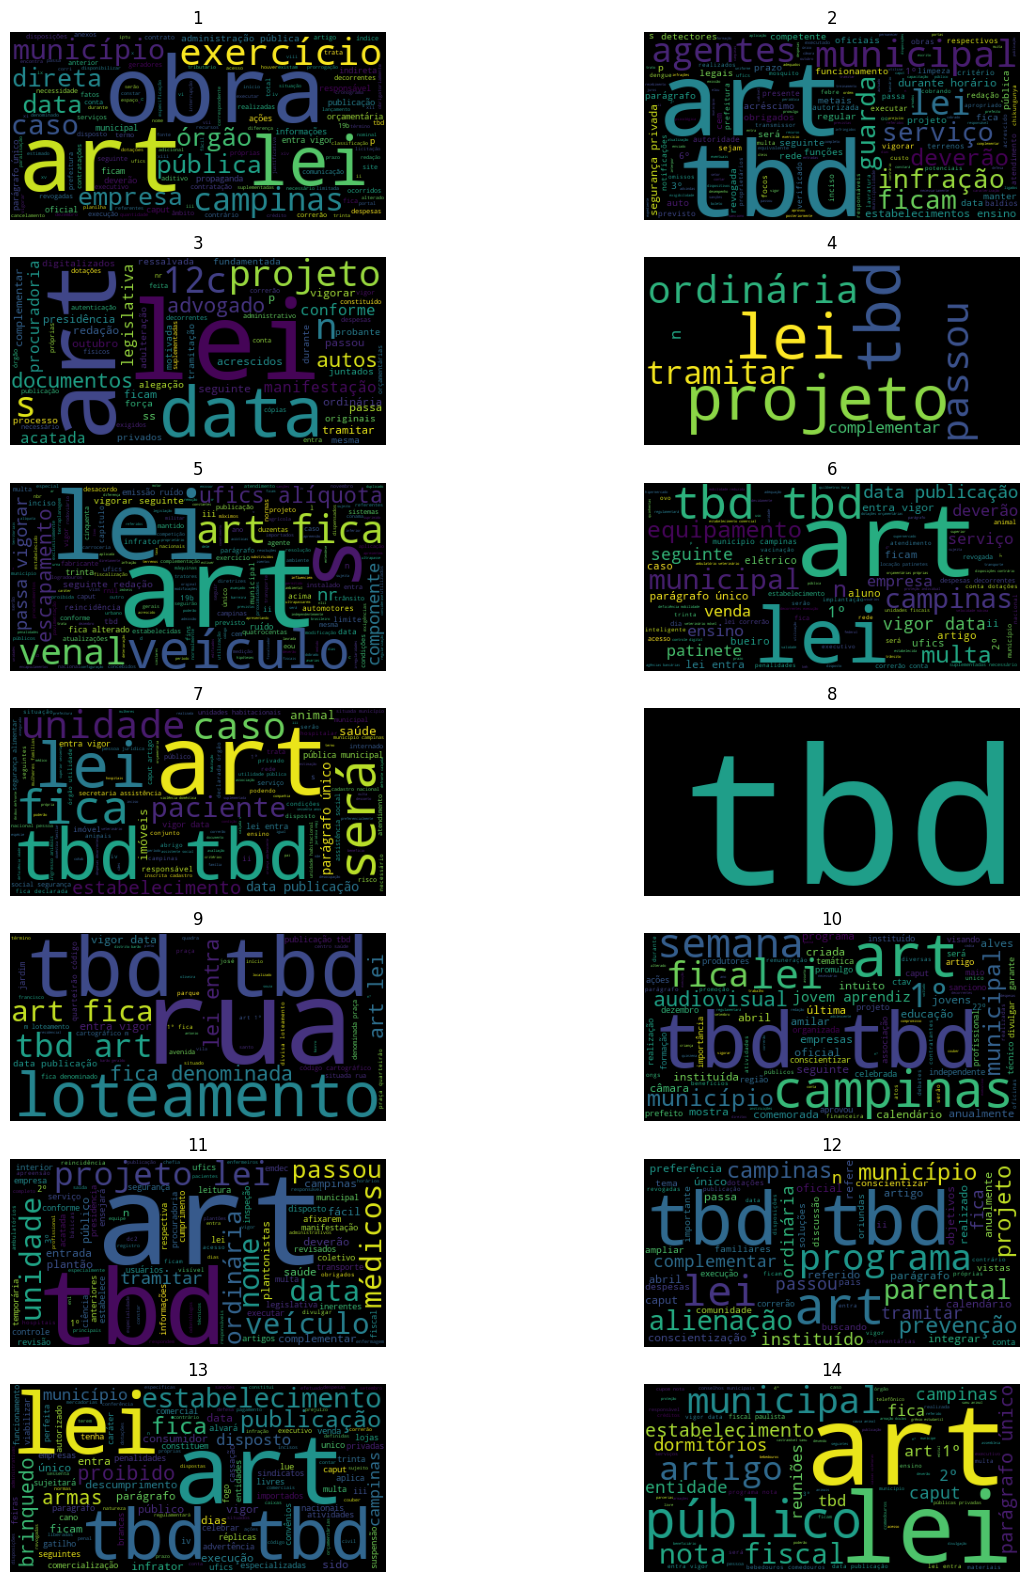

In [73]:
# plot a word cloud for each genre
import matplotlib.pyplot as plt
from wordcloud import WordCloud

fig, axes = plt.subplots(7, 2, figsize=(15, 20))
idx = 0
for row in range(7):
    for col in range(2):
        nota = notas[idx]
        
        df_nota = df_train.query("Nota == @nota")

        text = ' '.join(df_nota['Texto'])
        wordcloud = WordCloud().generate(text)
        axes[row, col].imshow(wordcloud)
        axes[row, col].set_title(f'{nota}')
        axes[row, col].axis('off')

        idx += 1

### 3. Feature Extraction

In [74]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()

X_train = tfidf.fit_transform(df_train['Texto-pre'])
y_train = df_train['Label']

X_test = tfidf.transform(df_test['Texto-pre'])
y_test = df_test['Label']

In [75]:
X_train.shape, X_test.shape

((267, 1875), (67, 1875))

In [76]:
print(f'Vocabulary size: {len(tfidf.vocabulary_)}')

Vocabulary size: 1875


### 4. Treinamento de modelos

In [77]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(class_weight='balanced', n_jobs=-1)

logreg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', n_jobs=-1)

In [78]:
# prediction on training set
y_train_pred = logreg.predict(X_train)

In [79]:
from sklearn.metrics import classification_report

#print(classification_report(y_train, y_train_pred, target_names=target_names))
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       237
           1       0.64      0.47      0.54        30

    accuracy                           0.91       267
   macro avg       0.79      0.72      0.74       267
weighted avg       0.90      0.91      0.90       267



In [80]:
from sklearn.metrics import f1_score

f1_train = f1_score(y_train, y_train_pred, average='macro')

print(f'F1 Train: {f1_train}')

F1 Train: 0.7443345036706033


In [81]:
from sklearn.metrics import balanced_accuracy_score

balacc_train = balanced_accuracy_score(y_train, y_train_pred)

print(f'Balanced Acc Train: {balacc_train}')

Balanced Acc Train: 0.7164556962025317


#### Evaluate the model on the Test Set

In [82]:
# prediction on testing set
y_test_pred = logreg.predict(X_test)

In [83]:
#from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        59
           1       0.25      0.25      0.25         8

    accuracy                           0.82        67
   macro avg       0.57      0.57      0.57        67
weighted avg       0.82      0.82      0.82        67



In [84]:
from sklearn.metrics import f1_score
f1_test = f1_score(y_test, y_test_pred, average='macro')
print(f'F1 Test: {f1_test}')

F1 Test: 0.5741525423728814


O resultado **F1 score** está baixo provavelmente devido a muitos campos NaN em no campo de "Texto'